### Transformation of Features
#### Why transformation of Features Are Required?
- Linear Regression --> Gradient Descent --------> Global Minima
- Algorithms ike KNN, K Means, Hierarichal clustering --------> Ecucledian Distance

#### Every point has some vectors and Direction

- Deep learning Techniques(Standardization, Scaling)
1. ANN ----> Global Minima, Gradient
2. CNN
3. RNN

# **Types of Transformation**
## 1. Normalization and Standardization
## 2. Scaling to Minimum and Maximum values
## 3. Scaling To Median and Quantiles
## 4. Gausian Transformation
- Logarithmic Transformation
- Resiprocal Transforamtion
- Square Root Transformation
- Exponential Transformation
- Box Coc Transformation

### 1. Standardization
We try to bring all the variables or features to a similar scale. Standardization means centring the variable to zero.
- z = ( x - x_mean ) / std

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('titanic.csv', usecols=['pclass', 'age', 'fare', 'survived'])

In [15]:
df.head()

,pclass,age,fare,survived
0,3,NaN,7.7333,1
1,3,38.0,8.6625,0
2,3,30.0,24.1500,0
3,2,54.0,23.0000,1
4,2,40.0,13.0000,0


In [16]:
df.age.fillna(df.age.median(), inplace=True)

In [17]:
df.isnull().sum()

pclass      0
age         0
fare        1
survived    0
dtype: int64

In [18]:
df.fare.fillna(df.fare.median(), inplace=True)

In [20]:
df.isnull().sum()

pclass      0
age         0
fare        0
survived    0
dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
## fit vs fit_transform
df_scaled = scaler.fit_transform(df)

In [27]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,0.811420,-0.093041,-0.489422,1.309830
1,0.811420,0.676701,-0.472102,-0.763458
2,0.811420,0.060908,-0.183408,-0.763458
3,-0.381845,1.908287,-0.204845,1.309830
4,-0.381845,0.830649,-0.391249,-0.763458
...,...,...,...,...
845,-1.575110,1.985261,0.298446,-0.763458
846,-1.575110,2.216184,-0.079954,-0.763458
847,-0.381845,-0.400937,-0.148924,1.309830
848,0.811420,-2.017394,-0.376802,-0.763458


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 35.,  14.,  16.,  27.,  81.,  96., 258.,  86.,  65.,  35.,  23.,
         31.,  28.,  20.,  15.,  12.,   3.,   2.,   2.,   1.]),
 array([-2.23548527, -1.92823024, -1.62097522, -1.31372019, -1.00646517,
        -0.69921014, -0.39195511, -0.08470009,  0.22255494,  0.52980996,
         0.83706499,  1.14432002,  1.45157504,  1.75883007,  2.06608509,
         2.37334012,  2.68059515,  2.98785017,  3.2951052 ,  3.60236022,
         3.90961525]),
 <BarContainer object of 20 artists>)

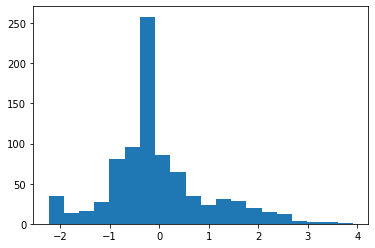

In [31]:
plt.hist(df_scaled[:,1], bins=20)

(array([206.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 166.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 478.]),
 array([-1.5751096 , -1.45578311, -1.33645663, -1.21713014, -1.09780366,
        -0.97847718, -0.85915069, -0.73982421, -0.62049772, -0.50117124,
        -0.38184475, -0.26251827, -0.14319178, -0.0238653 ,  0.09546119,
         0.21478767,  0.33411416,  0.45344064,  0.57276713,  0.69209361,
         0.8114201 ]),
 <BarContainer object of 20 artists>)

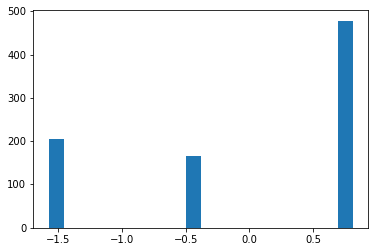

In [32]:
plt.hist(df_scaled[:,0], bins=20)

(array([544., 144.,  71.,  34.,  13.,  14.,   3.,   0.,  14.,   1.,   9.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.63357408, -0.15607285,  0.32142839,  0.79892962,  1.27643086,
         1.75393209,  2.23143333,  2.70893456,  3.18643579,  3.66393703,
         4.14143826,  4.6189395 ,  5.09644073,  5.57394196,  6.0514432 ,
         6.52894443,  7.00644567,  7.4839469 ,  7.96144813,  8.43894937,
         8.9164506 ]),
 <BarContainer object of 20 artists>)

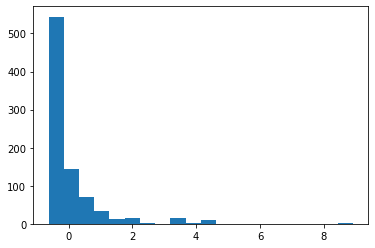

In [35]:
plt.hist(df_scaled[:,2], bins=20)

(array([544., 144.,  71.,  34.,  13.,  14.,   3.,   0.,  14.,   1.,   9.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

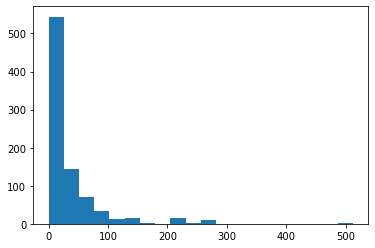

In [36]:
plt.hist(df.fare, bins=20)

In [37]:
df.age.median()

28.0

### 2. Min Max Scaling (CNN) ----- Deep Learning
Min Max Scaling scales the values between zero to one.
- X_scaled = ( X - X.min / ( X.max - X_min) ) 

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df), columns=df.columns)

In [41]:
df_minmax.head()

,pclass,age,fare,survived
0,1.0,0.348643,0.015094,1.0
1,1.0,0.473904,0.016908,0.0
2,1.0,0.373695,0.047138,0.0
3,0.5,0.674321,0.044893,1.0
4,0.5,0.498956,0.025374,0.0


(array([206.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 166.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 478.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

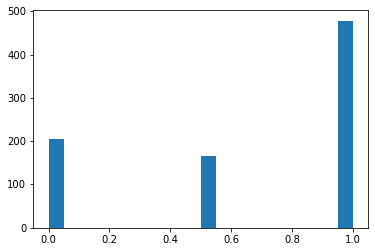

In [51]:
plt.hist(df_minmax.pclass, bins=20)

(array([ 35.,  14.,  16.,  27.,  81.,  96., 258.,  86.,  65.,  35.,  23.,
         31.,  28.,  20.,  15.,  12.,   3.,   2.,   2.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

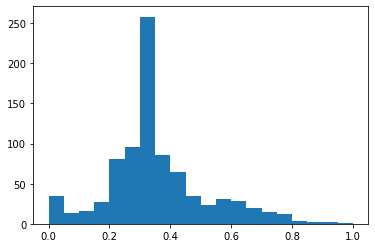

In [52]:
plt.hist(df_minmax.age, bins=20)

(array([544., 144.,  71.,  34.,  13.,  14.,   3.,   0.,  14.,   1.,   9.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

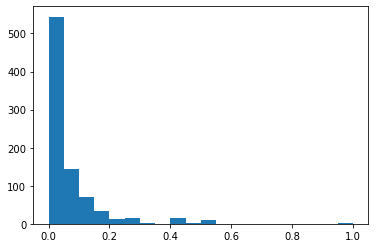

In [53]:
plt.hist(df_minmax.fare, bins=20)

### 3. Robust Scaler
- It is used to scale the featuer to median and quantiles.
- Scaling using median and quantiles consits of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference the 75th and 25th quantile.
- IQR = 75th quantile - 25th quantile
- X_sclaed = ( X - X.median ) / IQR

#### 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
- 9-90 percentile ----- 90% of the all the values in this group is less than 9
- 1-10 percentile ----- 10% of the all the values in this group is less than 1
- 4-40 percentile ----- 40% of the all the values in this group is less than 4

In [45]:
from sklearn.preprocessing import RobustScaler

In [47]:
scaler = RobustScaler()
df_robust_scaler = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [49]:
df_robust_scaler.head()

,pclass,age,fare,survived
0,0.0,0.000000,-0.276835,1.0
1,0.0,0.776699,-0.236484,0.0
2,0.0,0.155340,0.436062,0.0
3,-1.0,2.019417,0.386123,1.0
4,-1.0,0.932039,-0.048128,0.0


(array([544., 144.,  71.,  34.,  13.,  14.,   3.,   0.,  14.,   1.,   9.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.61265451,  0.49974314,  1.61214079,  2.72453845,  3.8369361 ,
         4.94933375,  6.0617314 ,  7.17412906,  8.28652671,  9.39892436,
        10.51132201, 11.62371966, 12.73611732, 13.84851497, 14.96091262,
        16.07331027, 17.18570793, 18.29810558, 19.41050323, 20.52290088,
        21.63529854]),
 <BarContainer object of 20 artists>)

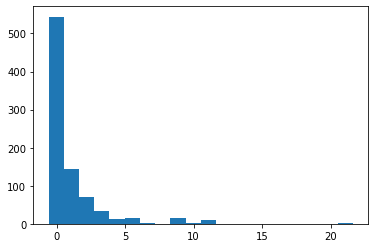

In [54]:
plt.hist(df_robust_scaler.fare, bins=20)

(array([ 35.,  14.,  16.,  27.,  81.,  96., 258.,  86.,  65.,  35.,  23.,
         31.,  28.,  20.,  15.,  12.,   3.,   2.,   2.,   1.]),
 array([-2.16180971, -1.85177748, -1.54174524, -1.23171301, -0.92168078,
        -0.61164854, -0.30161631,  0.00841592,  0.31844816,  0.62848039,
         0.93851262,  1.24854485,  1.55857709,  1.86860932,  2.17864155,
         2.48867379,  2.79870602,  3.10873825,  3.41877049,  3.72880272,
         4.03883495]),
 <BarContainer object of 20 artists>)

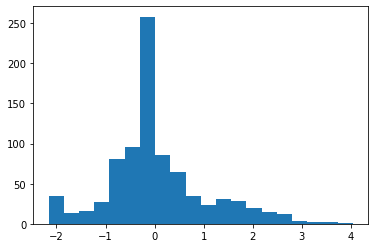

In [57]:
plt.hist(df_robust_scaler.age, bins=20)

(array([206.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 166.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 478.]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <BarContainer object of 20 artists>)

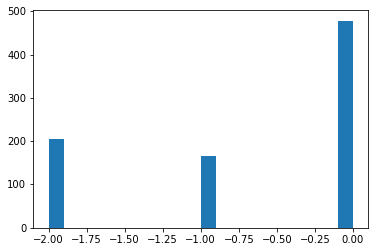

In [58]:
plt.hist(df_robust_scaler.pclass, bins=20)

### 4. Gausian Transformation
Some machine learning algorithms like linear and logistic assume that the features are normally distributed. It gives use good accuracy and performance.
- Logarithmic Transformation
- Resiprocal Transforamtion
- Square Root Transformation
- Exponential Transformation (more general, you can use any exponent)
- Box Coc Transformation

In [68]:
df = pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])

In [69]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [70]:
### fill nan
df.age = df.age.fillna(df.age.median())
df.fare = df.fare.fillna(df.fare.median())

In [71]:
df.isnull().sum()

age         0
fare        0
survived    0
dtype: int64

In [73]:
df.head()

,age,fare,survived
0,28.0,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [79]:
import scipy.stats as stat
import pylab
import numpy as np

In [77]:
### if i want to check whether feature is gaussian or normal distibution or not
### Q-Q plot
def plot_data(df, feature):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()

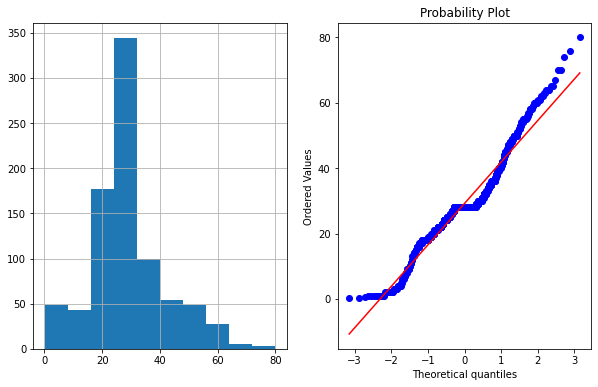

In [78]:
plot_data(df, 'age')

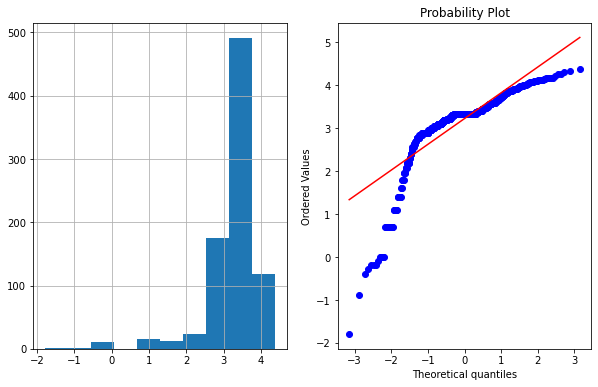

In [80]:
## Logarithmic Transformation
df['age_log'] = np.log(df['age'])
plot_data(df, 'age_log')

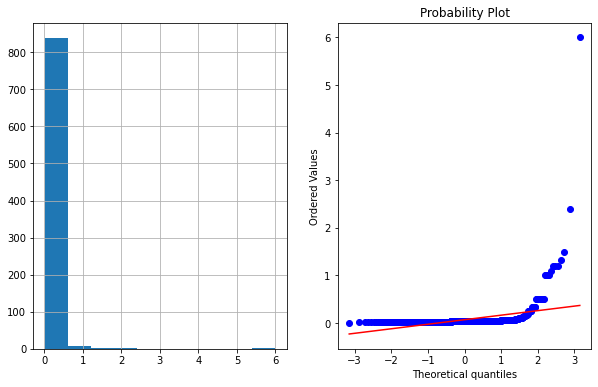

In [84]:
## resiprocal Transformation
df['age_resiprocal'] = 1 / df.age
plot_data(df, 'age_resiprocal')

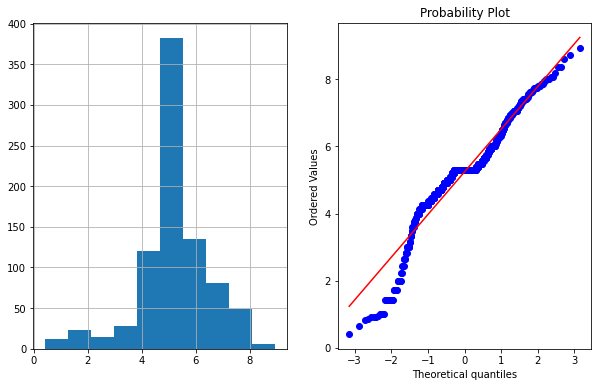

In [90]:
## Square Root Transformation
df['age_sqare'] = np.sqrt(df.age)
plot_data(df, 'age_sqare')

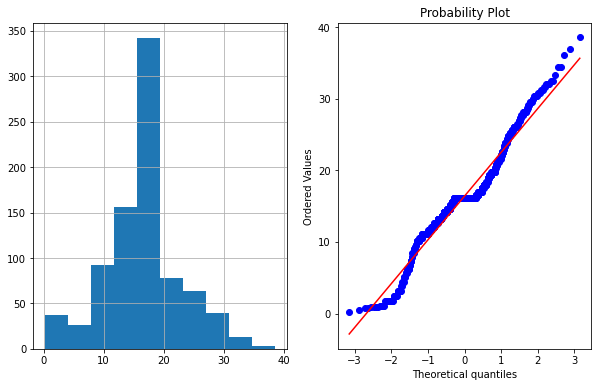

In [94]:
## Exponential Transformation
df['age_exponential'] = df.age**(1/1.2)
plot_data(df, 'age_exponential')

### Box Cox Transformation
The Box-Cox transformation is defined as:
- T(Y) = (Y exp(λ) - 1) / λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [ ]:
df['age_boxcox'], parameters = stat.boxcox(df.age)

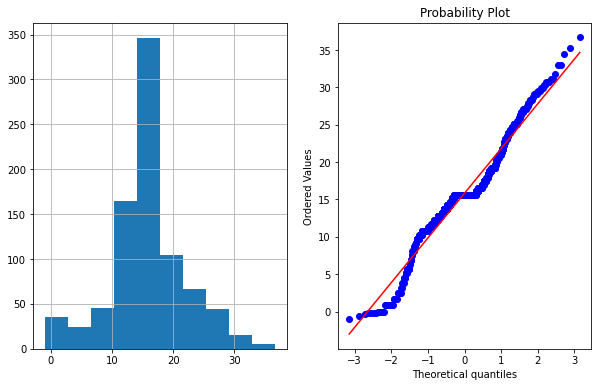

In [98]:
plot_data(df, 'age_boxcox')

In [104]:
df[df.fare == 0]

,age,fare,survived,age_log,fare_log,age_resiprocal,age_sqare,age_exponential,age_boxcox
6,19.0,0.0,0,2.944439,-inf,0.052632,4.358899,11.631293,11.251161
95,40.0,0.0,0,3.688879,-inf,0.025000,6.324555,21.629675,20.974026
114,49.0,0.0,1,3.891820,-inf,0.020408,7.000000,25.615140,24.744296
140,28.0,0.0,0,3.332205,-inf,0.035714,5.291503,16.068119,15.621574
145,49.0,0.0,0,3.891820,-inf,0.020408,7.000000,25.615140,24.744296
340,28.0,0.0,0,3.332205,-inf,0.035714,5.291503,16.068119,15.621574
346,38.0,0.0,0,3.637586,-inf,0.026316,6.164414,20.724608,20.110838
506,28.0,0.0,0,3.332205,-inf,0.035714,5.291503,16.068119,15.621574
586,36.0,0.0,0,3.583519,-inf,0.027778,6.000000,19.811563,19.237161
703,28.0,0.0,0,3.332205,-inf,0.035714,5.291503,16.068119,15.621574


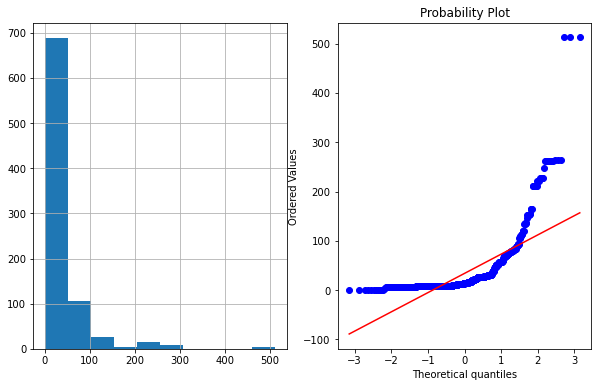

In [115]:
plot_data(df, 'fare')

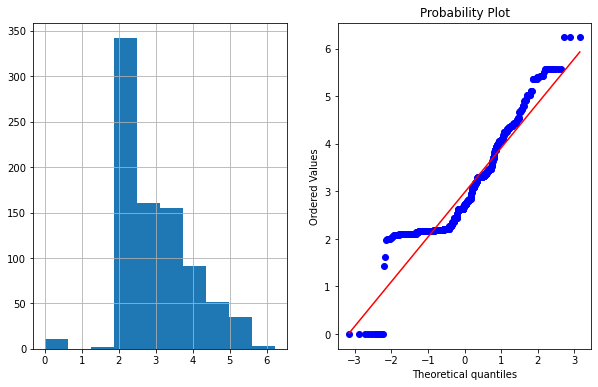

In [105]:
df['fare_log'] = np.log1p(df.fare)
plot_data(df, 'fare_log')

In [118]:
df['fare_boxcox'], parameters = stat.boxcox(df.fare + 1)

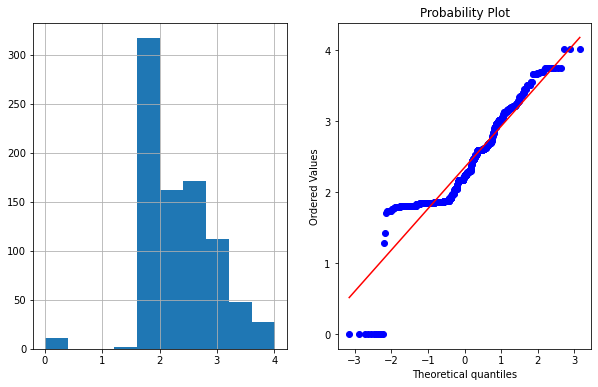

In [119]:
plot_data(df, 'fare_boxcox')

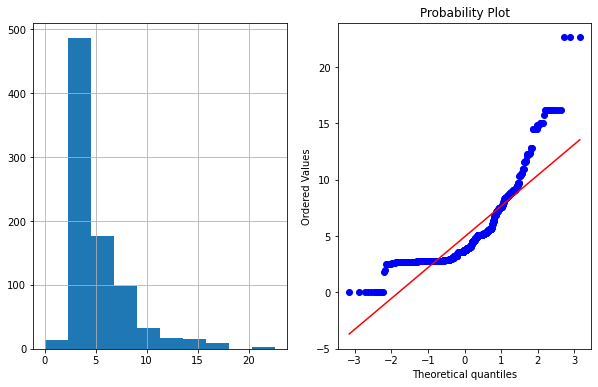

In [120]:
df['fare_sqare'] = np.sqrt(df.fare)
plot_data(df, 'fare_sqare')

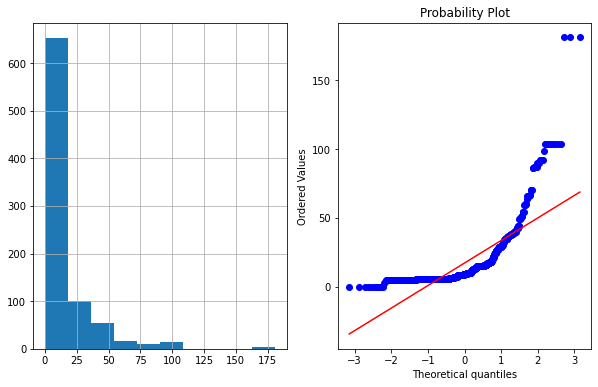

In [121]:
df['fare_exponential'] = df.fare**(1/1.2)
plot_data(df, 'fare_exponential')

In [123]:
stock_prices = [
    ['march 6', 310.0],
    ['march 7', 340.0],
    ['march 8', 380.0],
    ['march 9', 297.0]
]

In [129]:
for  e in stock_prices:
    print(e[1])

310.0
340.0
380.0
297.0
